<a href="https://colab.research.google.com/github/rahgirrafi/Machine_learning_course/blob/main/Supervised_Machine_Learning_regression_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Single Feature/Parameter**

<a name="toc_40291_2.1"></a>

Model:
$$f_{w,b}(x^{(i)}) = wx^{(i)} + b $$

The cost function:
$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2\tag{2}$$ 


The gradient is defined as:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \\
\end{align}
$$

In lecture, *gradient descent* was described as:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
where, parameters $w$, $b$ are updated simultaneously.  
The gradient is defined as:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$

Here *simultaniously* means that you calculate the partial derivatives for all the parameters before updating any of the parameters.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import time

In [3]:
x = np.array([1,2,3,4,5,6,7,8])
y= np.array([10,8,12,11,16,13,15,17])
w=1
b=1

In [4]:
def cost_function(X_train, y_train, w,b):
  m = X_train.shape[0]
  f_wb = np.dot(X_train, w) + b
  cost = 0
  cost_temp = (f_wb - y_train)**2
  cost = np.sum(cost_temp)
  return cost/(2*m)

cost_function(x,y,w,b)

27.375

In [5]:
def gradient(x:np.array, y:np.array, w:float, b:float):
  m = x.shape[0]
  j_wb = 0
  dj_dw_sum_holder = 0
  dj_db_sum_holder = 0

  for i in range(m):
    f_wb = w*x[i] +b
    dj_dw_temp = (f_wb - y[i])*x[i]
    dj_db_temp = (f_wb - y[i]) 
    dj_dw_sum_holder += dj_dw_temp
    dj_db_sum_holder += dj_db_temp

  dj_dw =  dj_dw_sum_holder / m
  dj_db =  dj_db_sum_holder / m

  return dj_dw, dj_db




In [6]:
def gradient_descent(x:np.array, y:np.array, w:float, b:float, a, n, gradient ):
  for i in range(n):
    dj_dw, dj_db = gradient(x,y,w,b)
    w_temp = w - a* dj_dw
    b_temp = b - a* dj_db
    w= w_temp
    b= b_temp
  return w, b

w,b = gradient_descent(x, y, w, b, 0.01, 1000, gradient)

print(w,b)

1.254298962470829 6.927139486327555


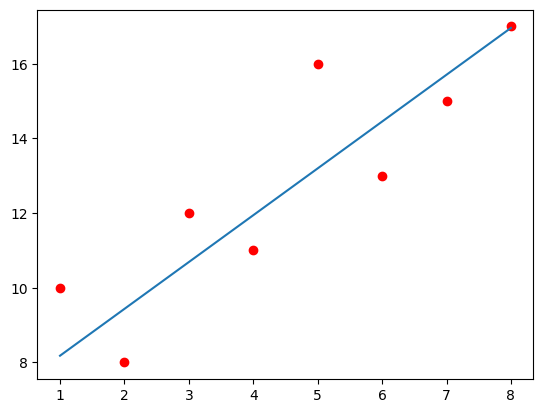

In [7]:
plt.scatter(x,y,c = 'r')
y2 = w*x +b
plt.plot(x,y2)
plt.show()

##Multiple Feature 

**Model:**
$$ f_{\mathbf{w},b}(\mathbf{x}) =  w_0x_0 + w_1x_1 +... + w_{n-1}x_{n-1} + b $$

$$ f_{\mathbf{w},b}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b  \tag{4} $$ 


The equation for the cost function with multiple variables $J(\mathbf{w},b)$ is:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 \tag{3}$$ 
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b  \tag{4} $$ 



**Gradient descent for multiple variables:**

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{5}  \; & \text{for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$


**Gradient:**

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{6}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{7}
\end{align}
$$
* m is the number of training examples in the data set

    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value


In [8]:
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

#randomly give some initial value to w and b
w = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])
b = 785.1811367994083
f_wb = np.dot(X_train, w) + b

m,n = X_train.shape
arr = np.zeros((n,m)) 
for i in range(n):
  for j in range(n-1): 
    arr[i,j] = X_train[j,i]
f_wb

array([459.99999762, 231.99999837, 177.99999899])

In [9]:
def gradient_multi(X_train, y_train, w, b):

  m,n = X_train.shape
  dj_dw_sum_holder = np.array([])
  dj_db_sum_holder = np.array([])
  f_wb = np.dot(X_train , w) +b
  err = f_wb - y_train

  arr = np.zeros((n,m)) 
  for i in range(n):
    for j in range(n-1): 
      arr[i,j] = X_train[j,i]
  
  for i in range(w.shape[0]):
    #print(f'w_temp = {err} * {arr[i]}')
    w_temp = err * arr[i]
    dj_dw_sum_holder = np.append(dj_dw_sum_holder, np.sum(w_temp) ) 
  dj_dw = dj_dw_sum_holder/m

  dj_db = np.sum(err)/m
 
  return  dj_dw, dj_db
gradient_multi(X_train,y_train,w,b)

(array([-2.72623574e-03, -6.27197255e-06, -2.21745574e-06, -6.92403377e-05]),
 -1.6739251122999121e-06)

In [17]:
initial_w = np.zeros_like(w)
initial_b = 0
def gradient_descent_multi(x:np.array, y:np.array, w, b, a, n, gradient_multi):
  
  w_temp = copy.deepcopy(w)
  for i in range(n):
    dj_dw, dj_db = gradient_multi(X_train,y_train,w,b)
    w_temp = w - a* dj_dw  
    b_temp = b - a* dj_db
    w= w_temp
    b= b_temp
  return w, b


gradient_descent_multi(X_train,y_train, initial_w, initial_b, 5.0e-7, 1000,gradient_multi)


(array([ 0.20396569,  0.00374919, -0.0112487 , -0.0658614 ]),
 -0.0022354075309325345)